In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www[^ ]+'

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not", "haven't":"have not", "hasn't":"has not", "hadn't":"had not",
                 "won't":"would not", "wouldn't":"would not", "don't":"do not", "doesn't":"does not", "didn't":"did not", "can't":"can not", "couldn't":"could not",
                 "shouldn't":"should not", "mightn't":"might not", "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) +r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    
    try:
        bom_removed = souped.decode("utf_8_sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    
    stripped = re.sub(combined_pat,'', bom_removed)
    stripped = re.sub(www_pat,'', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    
    words = [x for x in tok.tokenize(letters_only) if len(x) > 1]
    return(" ".join(words)).strip()

In [3]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='utf8', header=None, usecols=[0,5], names=['sentiment','text'])
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [4]:
%%time
print("Cleaning the tweets..\n")
clean_tweet_texts = []
for i in range(0, len(df)):
    if( (i+1)%10000 == 0):
        print("Tweets %d of %d has been processed" % (i+1, len(df)))
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning the tweets..

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed


C:\Users\Rushi\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'Cookies '" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweets 230000 of 1600000 has been processed
Tweets 240000 of 1600000 has been processed
Tweets 250000 of 1600000 has been processed
Tweets 260000 of 1600000 has been processed
Tweets 270000 of 1600000 has been processed
Tweets 280000 of 1600000 has been processed
Tweets 290000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 310000 of 1600000 has been processed
Tweets 320000 of 1600000 has been processed
Tweets 330000 of 1600000 has been processed
Tweets 340000 of 1600000 has been processed
Tweets 350000 of 1600000 has been processed
Tweets 360000 of 1600000 has been processed
Tweets 370000 of 1600000 has been processed
Tweets 380000 of 1600000 has been processed
Tweets 390000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 410000 of 1600000 has bee

C:\Users\Rushi\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 770000 of 1600000 has been processed
Tweets 780000 of 1600000 has been processed
Tweets 790000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 810000 of 1600000 has been processed
Tweets 820000 of 1600000 has been processed
Tweets 830000 of 1600000 has been processed
Tweets 840000 of 1600000 has been processed
Tweets 850000 of 1600000 has been processed
Tweets 860000 of 1600000 has been processed
Tweets 870000 of 1600000 has been processed
Tweets 880000 of 1600000 has been processed
Tweets 890000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 910000 of 1600000 has been processed
Tweets 920000 of 1600000 has been processed
Tweets 930000 of 1600000 has been processed
Tweets 940000 of 1600000 has been processed
Tweets 950000 of 1600000 has been processed
Tweets 960000 of 1600000 has been processed
Tweets 970000 of 1600000 has been processed
Tweets 980000 of 1600000 has been processed
Tweets 990000 of 1600000 has bee

C:\Users\Rushi\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'PICTURES '" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1180000 of 1600000 has been processed
Tweets 1190000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed


C:\Users\Rushi\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1600000 has been processed
Tweets 1430000 of 1600000 has been processed
Tweets 1440000 of 1600000 has been processed
Tweets 1450000 of 1600000 has been processed
Tweets 1460000 of 1600000 has been processed
Tweets 1470000 of 1600000 has been processed
Tweets 1480000 of 1600000 has been processed
Tweets 1490000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1510000 of 1600000 has been processed
Tweets 152

In [5]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweets.csv', encoding='utf-8')

In [6]:
csv = 'clean_tweets.csv'
my_df = pd.read_csv(csv, index_col = 0)
my_df.head()

C:\Users\Rushi\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,that bummer you shoulda got david carr of thir...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [7]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596064 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [8]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [9]:
np.sum(my_df.isnull().any(axis=1))

3936

In [10]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [11]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='utf8', header=None)
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


In [12]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True, inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596064 entries, 0 to 1596063
Data columns (total 2 columns):
text      1596064 non-null object
target    1596064 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [13]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep = ' ')

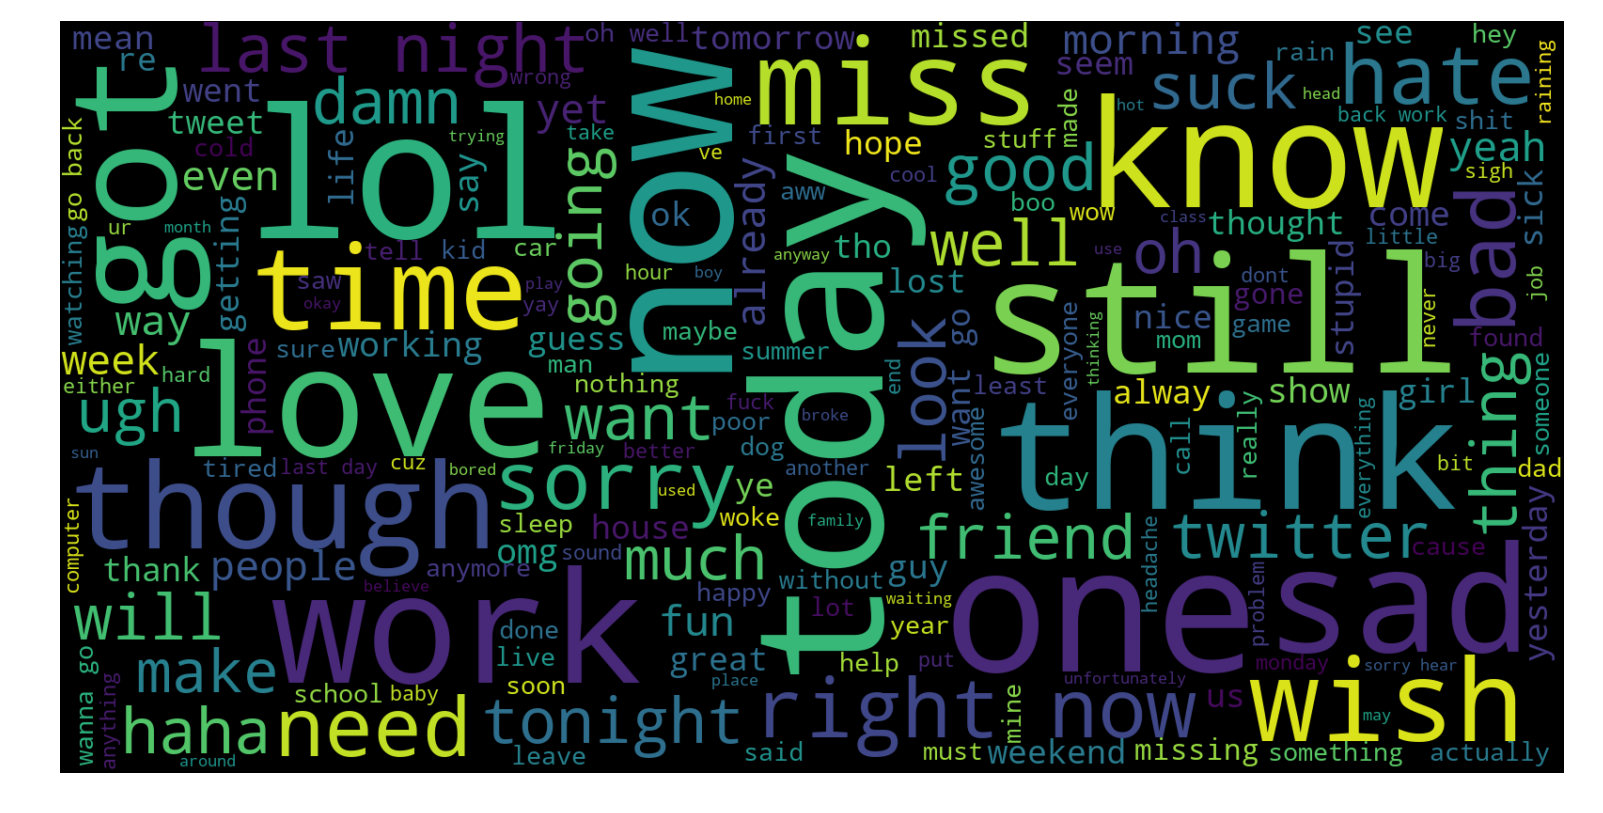

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep = ' ')

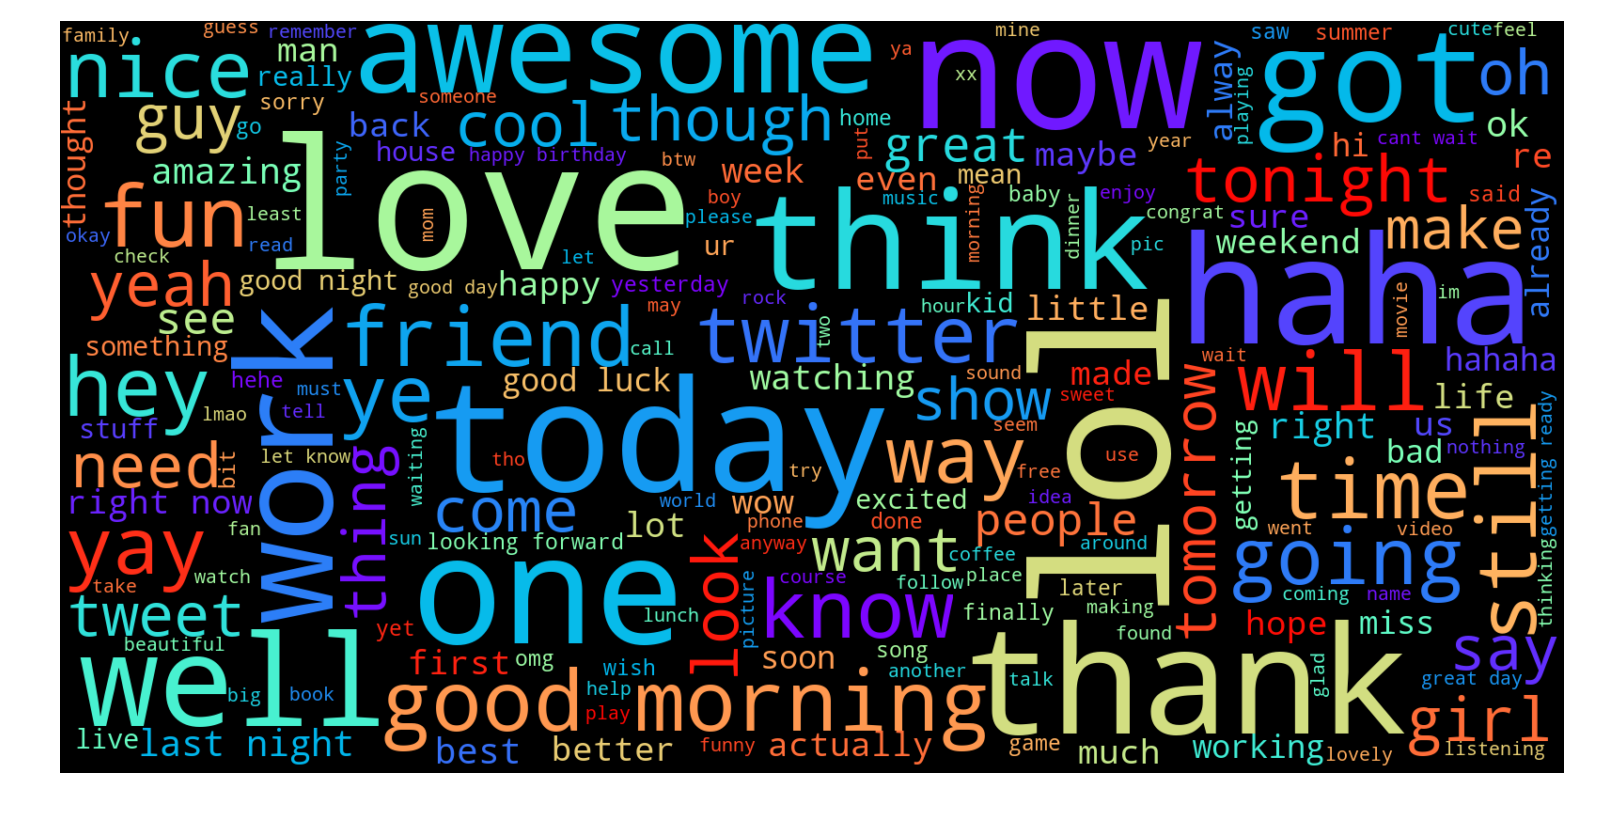

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='rainbow').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, df

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
len(cvec.get_feature_names())

264956

In [20]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [21]:
document_matrix = cvec.transform(my_df.text)

In [22]:
my_df[my_df.target == 0].tail()

,text,target
798193,sick spending my day laying in bed listening to,0
798194,gmail is down,0
798195,rest in peace farrah so sad,0
798196,sounds like rival is flagging your ads not muc...,0
798197,has to resit exams over summer wishes he worke...,0


In [23]:
%%time
pos_batches = np.linspace(798179,1596019,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

806237 entries' term freuquency calculated
886827 entries' term freuquency calculated
967417 entries' term freuquency calculated
1048007 entries' term freuquency calculated
1128597 entries' term freuquency calculated
1209187 entries' term freuquency calculated
1289777 entries' term freuquency calculated
1370367 entries' term freuquency calculated
1450957 entries' term freuquency calculated
1531547 entries' term freuquency calculated
1596019 entries' term freuquency calculated
Wall time: 57min 46s


In [24]:
%time
neg_batches = np.linspace(0,798179,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

Wall time: 0 ns
8062 entries' term freuquency calculated
88686 entries' term freuquency calculated
169310 entries' term freuquency calculated
249934 entries' term freuquency calculated
330558 entries' term freuquency calculated
411183 entries' term freuquency calculated
491807 entries' term freuquency calculated
572431 entries' term freuquency calculated
653055 entries' term freuquency calculated
733679 entries' term freuquency calculated
798179 entries' term freuquency calculated


In [25]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aa,154,84
aaa,95,59
aaaa,47,32
aaaaa,26,11
aaaaaa,17,12


In [26]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313156,252561,565717
the,257867,265995,523862
my,190837,125979,316816
it,157478,147796,305274
and,153968,149642,303610
you,103886,198333,302219
not,194756,86870,281626
is,133440,111194,244634
in,115541,101157,216698
for,99003,117363,216366


In [27]:
len(term_freq_df)

264956

In [28]:
term_freq_df.to_csv('term_freq_df.csv', encoding='utf-8')